In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from cvxopt import matrix, solvers
from sklearn.svm import SVC

parameters = {}
KERNEL_LINEAR = 1
KERNEL_RBF = 2

DATASET_LINEARLY_SEPARABLE = 1
DATASET_CIRCULAR = 2

In [15]:
def generate_data(dataset):
    n = 50
    X = np.random.rand(n, 2)
    y = np.zeros((n,))
    noise = np.random.uniform(-0.05, 0.05, n)
    
    if dataset == DATASET_LINEARLY_SEPARABLE:
        for i in range(n):
            x1 = X[i][0]
            x2 = X[i][1] + noise[i]
            y[i] = 1.0 if x2 <= 1.0 * x1 else -1.0
    else:
        r = 0.3
        centre = np.array([0.5, 0.5])

        for i in range(n):
            dist = np.linalg.norm(X[i] - centre) + noise[i]
            y[i] = 1.0 if dist <= r else -1.0
        
    parameters['X'] = X
    parameters['y'] = y
    
    return X, y

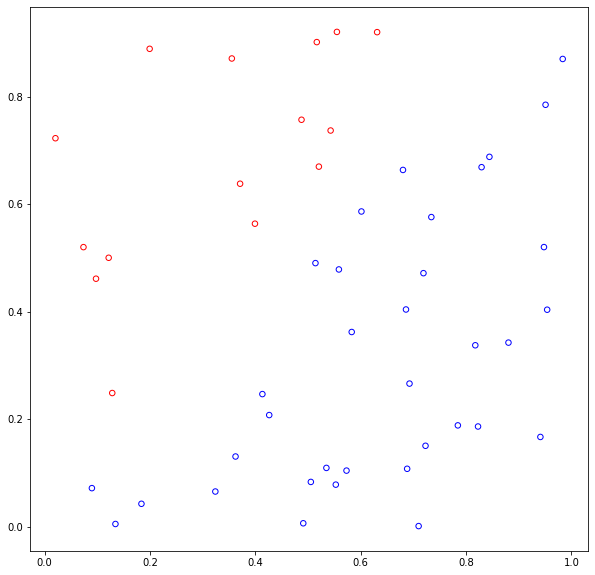

In [16]:
X, y = generate_data(DATASET_LINEARLY_SEPARABLE)
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(X[:,0], X[:,1], edgecolors=['red' if y_i == -1 else 'blue' for y_i in y], facecolors='none', s=30)
plt.show()

In [17]:
def gram_matrix(X, Y, kernel_type, gamma=0.5):
    K = np.zeros((X.shape[0], Y.shape[0]))
    
    if kernel_type == KERNEL_LINEAR:
        for i, x in enumerate(X):
            for j, y in enumerate(Y):
                K[i, j] = np.dot(x.T, y)
                
    elif kernel_type == KERNEL_RBF:
        for i, x in enumerate(X):
            for j, y in enumerate(Y):
                K[i, j] = np.exp(-gamma * np.linalg.norm(x - y) ** 2)
        
    return K

In [24]:
def train_svm(kernel):
    C = 10
    n, k = X.shape

    print(n)
    print(k)
    
    y_matrix = y.reshape(1, -1)
    print(y_matrix)
    H = np.dot(y_matrix.T, y_matrix) * gram_matrix(X, X, kernel)
    P = matrix(H)
    q = matrix(-np.ones((n, 1)))
    G = matrix(np.vstack((-np.eye((n)), np.eye(n))))
    h = matrix(np.vstack((np.zeros((n,1)), np.ones((n,1)) * C)))
    A = matrix(y_matrix)
    print(A)
    b = matrix(np.zeros(1))
    
    solvers.options['abstol'] = 1e-10
    solvers.options['reltol'] = 1e-10
    solvers.options['feastol'] = 1e-10

    return solvers.qp(P, q, G, h, A, b)

In [25]:
X = parameters['X']
svm_parameters = train_svm(KERNEL_LINEAR)
print(svm_parameters)

50
2
[[ 1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.
   1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1.
   1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1.  1.  1. -1.]]
[ 1.00e+00  1.00e+00  1.00e+00  1.00e+00 -1.00e+00 -1.00e+00 -1.00e+00 ... ]

     pcost       dcost       gap    pres   dres
 0:  7.8311e+01 -2.6588e+03  4e+03  3e-01  3e-15
 1:  5.5074e+01 -3.5766e+02  4e+02  1e-02  3e-15
 2: -2.5677e+01 -1.0961e+02  8e+01  1e-03  2e-15
 3: -5.3814e+01 -9.5439e+01  4e+01  5e-04  2e-15
 4: -6.4534e+01 -7.9690e+01  2e+01  2e-04  3e-15
 5: -6.9257e+01 -7.7276e+01  8e+00  5e-05  2e-15
 6: -7.2140e+01 -7.2786e+01  6e-01  4e-15  3e-15
 7: -7.2465e+01 -7.2482e+01  2e-02  2e-16  3e-15
 8: -7.2474e+01 -7.2474e+01  2e-04  1e-14  2e-15
 9: -7.2474e+01 -7.2474e+01  2e-06  4e-15  2e-15
10: -7.2474e+01 -7.2474e+01  2e-08  4e-15  2e-15
11: -7.2474e+01 -7.2474e+01  2e-10  4e-15  2e-15
Optimal solution found.
{'x': <50x1 matrix, tc='d'>, 'y': <1x1 matrix, tc